<a href="https://colab.research.google.com/github/AndrewWalker251/Capstone_self_driving_project/blob/master/S3%20-%20Specific%20Algorithms/L3%20-%20EfficientDet/EfficientDET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries. 

## testing changes using  drive.

## Now using the drive version can we push to github.. 

# Pytorch
import torch
import torchvision

# Image handling
from PIL import Image


import numpy as np
import pandas as pd
from glob import glob
from torch.utils.data import Dataset,DataLoader
import albumentations as A
#from albumentations.pytorch.transforms import ToTensorV2
import cv2
import gc
from matplotlib import pyplot as plt
import requests

import torchvision.transforms as T


In [ ]:
transform = T.Compose([
    #T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)

In [ ]:
url = 'https://github.com/AndrewWalker251/object_detection_methods/blob/master/DETR/andy_murray.jpg?raw=true'
im = Image.open(requests.get(url, stream=True).raw)
img = transform(im).unsqueeze(0)

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [ ]:
display(img)

tensor([[[[-2.0152, -2.0152, -2.0152,  ..., -2.0665, -2.0665, -2.0665],
          [-1.9980, -1.9980, -1.9980,  ..., -2.0665, -2.0665, -2.0665],
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          ...,
          [ 1.4098,  1.3755,  1.3413,  ...,  0.6734,  0.6563,  0.6563],
          [ 1.3755,  1.3413,  1.2728,  ...,  0.6734,  0.6563,  0.6563],
          [ 1.3755,  1.3070,  1.2385,  ...,  0.6734,  0.6563,  0.6563]],

         [[-0.2500, -0.2500, -0.2500,  ..., -0.5826, -0.5826, -0.5826],
          [-0.2325, -0.2325, -0.2325,  ..., -0.5826, -0.5826, -0.5826],
          [-0.2150, -0.2150, -0.2150,  ..., -0.5826, -0.5826, -0.5826],
          ...,
          [ 1.4657,  1.4482,  1.4832,  ...,  0.8704,  0.8529,  0.8529],
          [ 1.4307,  1.4132,  1.4132,  ...,  0.8704,  0.8529,  0.8529],
          [ 1.4482,  1.4307,  1.3782,  ...,  0.8704,  0.8529,  0.8529]],

         [[-0.2358, -0.2358, -0.2358,  ..., -0.5495, -0.5495, -0.5495],
          [-0.2184, -0.2184, -

In [ ]:
# propagate through the model
outputs = model(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
outputs

[{'boxes': tensor([[ 12.6023, 306.1444, 203.3189, 421.3113],
          [  1.9209, 167.8260, 273.0866, 418.1008],
          [  0.0000,   0.0000, 401.0933, 427.0000],
          [  6.3045,  45.0510, 574.0856, 386.2975],
          [176.1464, 368.1355, 244.5010, 424.1321]], grad_fn=<StackBackward>),
  'labels': tensor([1, 1, 1, 3, 1]),
  'scores': tensor([0.1404, 0.0975, 0.0641, 0.0618, 0.0505], grad_fn=<IndexBackward>)}]

In [ ]:
outputs[0]['labels'].detach().numpy()[0]

1

In [ ]:
box_1 = outputs[0]['boxes'][1].detach().numpy()
box_1
label = COCO_INSTANCE_CATEGORY_NAMES[outputs[0]['labels'].detach().numpy()[1]]
label

'person'

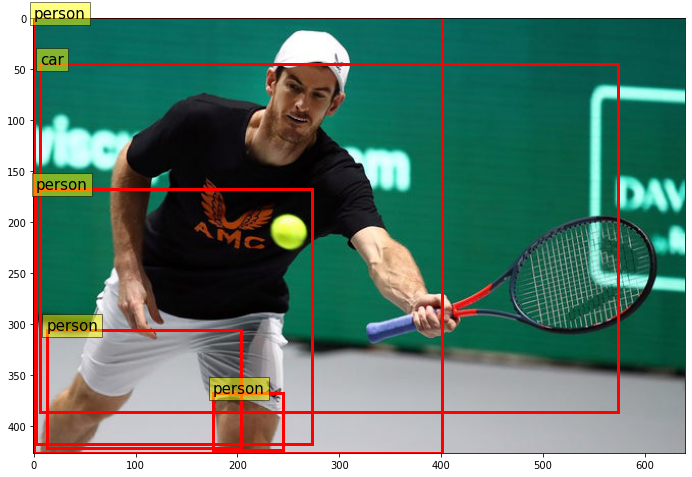

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(im)
ax = plt.gca()

for value in range(0,5):
  box_1 = outputs[0]['boxes'][value].detach().numpy()
  label = COCO_INSTANCE_CATEGORY_NAMES[outputs[0]['labels'].detach().numpy()[value]]
  ax.add_patch(plt.Rectangle((box_1[0], box_1[1]), box_1[2] - box_1[0], box_1[3] - box_1[1], fill=False, color='red', linewidth=3))
  ax.text(box_1[0], box_1[1], label, fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))

In [ ]:
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()
    return plt

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
>>> 
>>> # For training
>>> images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
>>> labels = torch.randint(1, 91, (4, 11))
>>> images = list(image for image in images)
>>> targets = []
>>> for i in range(len(images)):
>>>     d = {}
>>>     d['boxes'] = boxes[i]
>>>     d['labels'] = labels[i]
>>>     targets.append(d)
>>> output = model(images, targets)
>>> # For inference
>>> model.eval()
>>> x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
>>> predictions = model(x)
>>>
>>> # optionally, if you want to export the model to ONNX:
>>> torch.onnx.export(model, x, "faster_rcnn.onnx", opset_version = 11)

In [ ]:
def get_valid_transforms():
    return A.Compose([
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)

In [ ]:
config = get_efficientdet_config('tf_efficientdet_d5')
model = EfficientDet(config, pretrained_backbone=False)